<a href="https://colab.research.google.com/github/R1M1N/ZTM_tf2/blob/main/05_Fine_Tuning_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What are we going to cover
- Introduce fine-tuning transfer learning with TF
- Keras Functional API to build models
- Use small dataset to experiment faster
- Data Augmentation (without adding images, make training set more diverse)
- Running experiments on Food Vision Data
- Introduce model check point call back to save intermediate training results


## Basic overview of the process for feature extraction models
#### Preprocessing the data
- Get the [helper_functions.py](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py)
file always and import some functions in it.
- You may create different helper functions and use them directly here.
- Then get the data by downloading it from the net and then unzip it using unzip_data function imported from helper_functions.py.
- then walk_through_dir to know what folders do you have and how many images are there in each folder
- Then split the directories in Train and Test dir
- then set an IMG_SIZE, BATCH_SIZE and EPOCHS
- Then turn that those training and testing directories into data batches via image_dataset_from_directory(directory=path_to_directory,image_size=IMG_SIZE,batch_size=BATCH_SIZE,label_mode=BINARY OR CATEGORICAL)
- you can check the shape by typing the name of the data.
- You can also check the class names by adding .class_names
### Augmentation of Data
- Now if you want to augment the data you can do it here
- Create a Sequetial Layer within it with RandomFlip(), RandomRotation(),
RandomZoom(), RandomWidth() etc. if Rescaling Required can be done here.


### Creating a plot to visualize
- Choose a random class
-  choose a random image from it by using listdir from os module
- create a image path
- read the image with mpimg.imread()
- plot it with plt.imshow()
- then design with plt.title() plt.axis(False)
- Create a new figure or make a subplot at starting
- pass the image to data_augmentation(img, training=True) training is set to True or else it will not display the image
- plot the image with plt.imshow(aug_img/255) to rescale it because matplotilib can either plot intergers or within [0,1].


#### Creating a model
 1. BASE MODEL with tf.keras.applications.MODEL_NAME(include_top=(binary)) base_model as model
 2. if True then you cannot change the output shape if false then you can
 3. set base_model.trainable = False if you do not want the whole model to train
 4. Define the input layer with shape and name
 - When creating the model pass the aug model before the passing the inputs to the base model as x = data_aug(x)
 5. if ResNetv2 it will need normalization if or rescaling
 6. Pass the inputs to the base model x as layer also if x is passed to a layer it will be on the right if x is model it will be passed within it
 7. Add a pooling layer to pick the most important features and reduce the number of computations x as layer GlobalAveragePooling2D
 8. write an output layer and pass the x as layer with Dense layer and neurons=classes, activation=(softmax or sigmoid) and name
 9. Combine the input and upto x(outut) layers via keras.Model()
 10. Compile the model loss (binary_crossentropy,sparse_categorical or categorical), optimizers (SGD or Adam), metrics (accuracy, recall precision f1)
 11. Fit the model (history = model.fit(train_data,epochs,steps_per_epoch,validation_data,validation_steps), callbacks)
 12. Plot loss curves

So we have been writing the walkthrough unzip and couple of other functions again and again in different notebook why not create a [helper_functions.py](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py) and make it accessible always.


In [75]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-14 04:23:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-14 04:23:16 (92.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [76]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [77]:
# You need to re-download the the helper-functions in every runtime because colab deletes it.

### Let's get some data
We learn how to use tf.keras.application which has bunch of pretrained models https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [78]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-11-14 04:23:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   131MB/s    in 1.2s    

2023-11-14 04:23:19 (131 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [79]:
# Check how many files are there in the folder
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [80]:
# Let's load our data
# Create our training and test directories
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [81]:
# Create some batches
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
EPOCHS = 5

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE,
                                                                            label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [82]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [83]:
# Check class names of our training data
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [84]:
train_data_10_percent.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [85]:
for images,labels in train_data_10_percent.take(2):
  print(images,labels)

tf.Tensor(
[[[[151.22958    122.28571     74.90306   ]
   [144.23979    117.45409     79.005104  ]
   [132.43367    111.36224     84.158165  ]
   ...
   [ 19.571407     7.571407     7.571407  ]
   [ 20.428585     6.4285846    6.4285846 ]
   [ 22.071463     8.071464     8.071464  ]]

  [[135.66327    115.30612     79.87755   ]
   [127.168365   109.602036    80.88776   ]
   [127.90306    113.10204     94.433685  ]
   ...
   [ 20.586777     7.0153046    7.0153046 ]
   [ 21.928572     5.9285717    6.9285717 ]
   [ 22.928572     6.9285717    7.9285717 ]]

  [[123.96429    116.82143     98.7602    ]
   [138.46939    132.19899    117.61225   ]
   [149.80103    144.08673    135.87756   ]
   ...
   [ 21.688793     5.2602215    5.2602215 ]
   [ 24.428572     6.           6.214286  ]
   [ 25.214287     6.785714     7.        ]]

  ...

  [[ 20.341839     9.341838     5.3418384 ]
   [ 23.204142    12.204142     8.204142  ]
   [ 21.04587     10.04587      8.04587   ]
   ...
   [ 52.566254    22.351

In [86]:
# Let's build a efficientnetB0 model with tf.keras.applications
# 1. BASE MODEL with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so prelearned patterns remain same)
base_model.trainable = False

# 3. Create the inputs into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name='Input_Layer')

# 4. If using ResNetv2 you will have to normalize the model
# x = tf.keras.layers.experimental.preprocessing.Normalization()(inputs)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. Pass the inputs to the base model (EfficientNet doesnt use normalized data it gets normalized automatically with this model)
x = base_model(inputs)
# Check shape after pass input to base model
print(f"Shape after base model gets inputs {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important features and use reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After Pooling {x.shape}")

# 7 Create an output activation
output = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# 8. Combine the input and the output layers using tf.keras.Model()
model_0 = tf.keras.Model(inputs,output)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics="accuracy")
# 10. Fit the model
history_model_0 = model_0.fit(train_data_10_percent,
          epochs=5,
          steps_per_epoch=len(train_data_10_percent),
          validation_data=test_data,
          validation_steps=len(test_data),
          callbacks=[create_tensorboard_callback("Tensorflow_hub","Efficient_net_Feature_extraction")])








Shape after base model gets inputs (None, 7, 7, 1280)
After Pooling (None, 1280)
Saving TensorBoard log files to: Tensorflow_hub/Efficient_net_Feature_extraction/20231114-042326
Epoch 1/5
24/24 [==============================] - 21s 579ms/step - loss: 1.8842 - accuracy: 0.4013 - val_loss: 1.3009 - val_accuracy: 0.7488
Epoch 2/5
24/24 [==============================] - 7s 303ms/step - loss: 1.0806 - accuracy: 0.7613 - val_loss: 0.8721 - val_accuracy: 0.8180
Epoch 3/5
24/24 [==============================] - 7s 304ms/step - loss: 0.7870 - accuracy: 0.8253 - val_loss: 0.6991 - val_accuracy: 0.8420
Epoch 4/5
24/24 [==============================] - 9s 355ms/step - loss: 0.6254 - accuracy: 0.8680 - val_loss: 0.6106 - val_accuracy: 0.8568
Epoch 5/5
24/24 [==============================] - 9s 366ms/step - loss: 0.5351 - accuracy: 0.8787 - val_loss: 0.5556 - val_accuracy: 0.8624


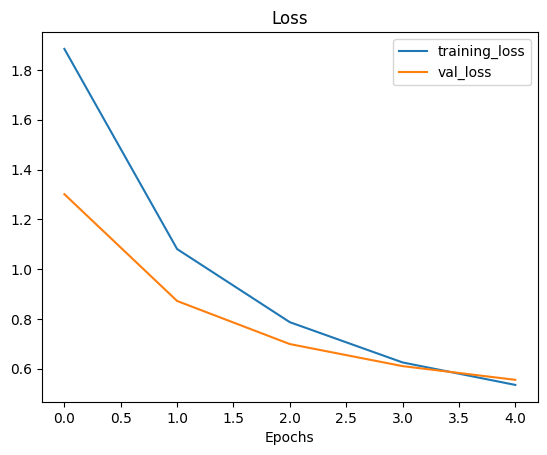

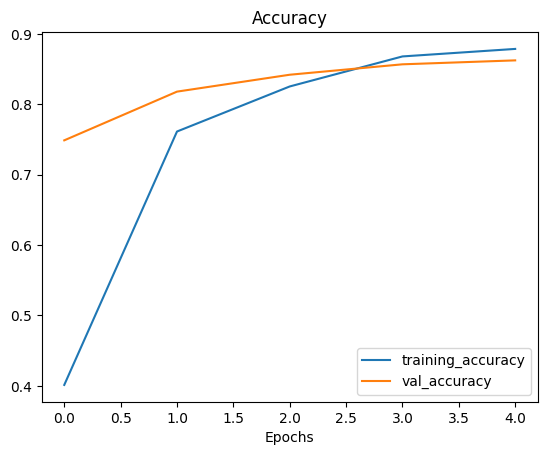

In [87]:
plot_loss_curves(history_model_0)

In [88]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_6
1 rescaling_6
2 normalization_5
3 rescaling_7
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [89]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, None, None, 3)        0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, None, None, 3)        7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, None, None, 3)        0         ['normalization_5

In [90]:
model_0.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

## Getting a feature vector from a trained model

We kinda dont know what going on in our feature vector i.e. GlobalAveragePooling2D() from (None,7,7,1280) what does it do that it gets (None,1280) its like it gets rid of them.
Let's see an example using (1,4,4,3)

In [91]:
# Define input shape(1,4,4,3)
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
tensor_1 = tf.random.normal(input_shape)
print(f"Random Input Tensor: {tensor_1}\n")

# Passing it to global average pooling layer
global_average_pooling_tensor = tf.keras.layers.GlobalAveragePooling2D()(tensor_1)
print(f"Global Average Pooled Tesor: {global_average_pooling_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {tensor_1.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooling_tensor.shape}")

Random Input Tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

Global Average Pooled Tesor: [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [92]:
# Let's replicate the global average pooling tensor
tf.reduce_mean(tensor_1,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [93]:
# Let's try with GlobalMaxPooling
# Define input shape(1,4,4,3)
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
tensor_1 = tf.random.normal(input_shape)
print(f"Random Input Tensor: {tensor_1}\n")

# Passing it to global average pooling layer
global_max_pooling_tensor = tf.keras.layers.GlobalMaxPooling2D()(tensor_1)
print(f"Global Max Pooled Tesor: {global_max_pooling_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {tensor_1.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_max_pooling_tensor.shape}")

Random Input Tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

Global Max Pooled Tesor: [[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [94]:
tf.reduce_max(tensor_1,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Running a series of transfer learning experiments
1. `model_1`: use feature extraction with 1% of the training data with data augmentation.

2. `model_2` : use feature extraction with 10% of the data with data augmentation.

3. `model_3` : use fine-tuning to with 10% of the training data with data augmentation.

4. `model_4` : use fine-tuning with 100% of the training data with data augmentation.


### The data augmentation done is:
- Random Flip
- Rotation
- Zoom
- Height
- Width

## Creating model_1 with 1% of the training data

In [95]:
# Let's start fresh and download the 1% data from https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-11-14 04:24:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   147MB/s    in 0.9s    

2023-11-14 04:24:31 (147 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [96]:
# Creating train and test dir
train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [97]:
# Walkthrough 1 percent of the data directory and list all the files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

How to do feature extraction Transfer learning
- Unzip Data
- walkthrough
- train test folder split
- data loaders add
- base_model
- inputs
- x =base_model(inputs)
- x(pooling layer)
- output = Dense()(x)
- Create model tf.keras.Model(inputs,output)
- compile model
- fit the data to the model

In [98]:
train_dir_1_percent = "/content/10_food_classes_1_percent/train/"
test_dir = "/content/10_food_classes_1_percent/test"

In [99]:
# Data laoders to create batches
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           batch_size=BATCH_SIZE,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [100]:
# Add augmentation layer to directly into our model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    # keras.preprocessing.Rescaling(1/255.) # Only for ResNetv2
    layers.RandomHeight(0.2)

],name="data_augmentation")

(-0.5, 553.5, 412.5, -0.5)

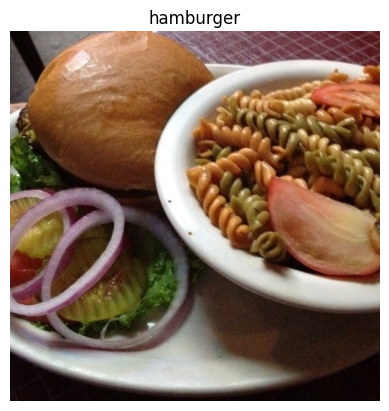

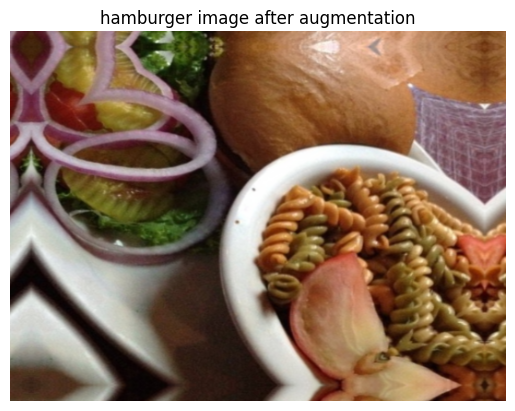

In [101]:
# Let's see what our data aumentation layer does
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import choice

# Let's first choose a random class
random_class =  choice(train_data_1_percent.class_names)
# Let's now select the whole path to our image
random_image = choice(os.listdir("10_food_classes_1_percent/train" + "/" + random_class))

random_image_path = train_dir_1_percent +random_class+"/" +random_image

img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(random_class)
plt.axis(False)

# Now let's plot our augmented image

plt.figure()
augmented_img = data_augmentation(img,training=True)
plt.imshow(augmented_img/255.)
plt.title(f"{random_class} image after augmentation")
plt.axis(False)

In [102]:
# Let's build the model
# First define input shape
input_shape = (224,224,3)

# Now let's choose a base model to build upon and freeze all the layers and include_top is False to set our own output layer
base_model = keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Now let's create the input layer
inputs = layers.Input(input_shape,name="Input_layer")

# We do data augmentation on the inputs only so let's do it before passing to the base model
x = data_augmentation(inputs)

# Now let's put the input in our base model
x = base_model(x, training=False)

# Now let's add the pooling layer layer
x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

# Now the output layer
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

# Combine the input and output to make a model
model_1 = keras.Model(inputs,outputs)

# Compile the model_1
model_1.compile(loss="categorical_crossentropy",
                metrics="accuracy",
                optimizer="adam")

# Fit the data to the model

history_model_1 = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=len(test_data)*0.25)



Epoch 1/5
3/3 [==============================] - 13s 2s/step - loss: 2.4516 - accuracy: 0.1143 - val_loss: 2.2969 - val_accuracy: 0.1484
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1589 - accuracy: 0.2571 - val_loss: 2.1817 - val_accuracy: 0.2250
Epoch 3/5
3/3 [==============================] - 6s 3s/step - loss: 2.0249 - accuracy: 0.3857 - val_loss: 2.0735 - val_accuracy: 0.3047
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.9018 - accuracy: 0.4714 - val_loss: 1.9729 - val_accuracy: 0.3797
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.7057 - accuracy: 0.6000 - val_loss: 1.8926 - val_accuracy: 0.4156


In [103]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 65ms/step - loss: 1.8660 - accuracy: 0.4396


[1.8659896850585938, 0.43959999084472656]

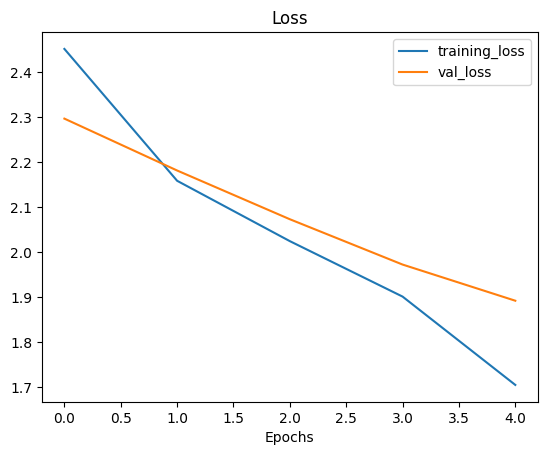

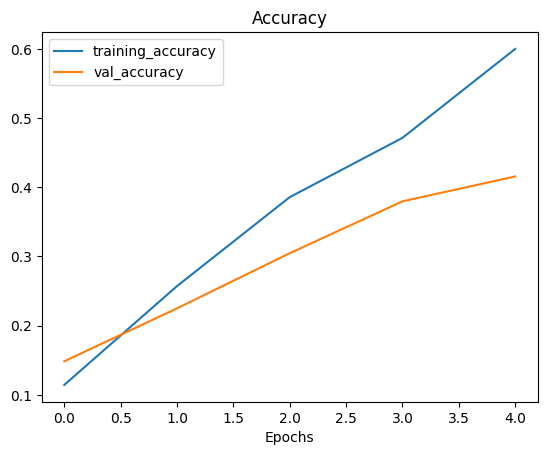

In [104]:
plot_loss_curves(history_model_1)

In [105]:
model_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

## Now Let's create model_2 with 10% of the training data and data augmentation


### We can use the shortcut actually or Completely write the whole process if you are learning you should choose the latter.


In [106]:
# Downlaod the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-11-14 04:25:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   235MB/s    in 0.7s    

2023-11-14 04:25:20 (235 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [107]:
# Define the train and test directories
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

In [108]:
# Define data loader and create batches
train_data_10_percent = keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                         image_size=(224,224),
                                                                         label_mode="categorical",
                                                                         )
test_data = keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             image_size=(224,224),
                                                             label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [109]:
# Now let's create the layer for data augmentation
augmentation_layer = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)

])

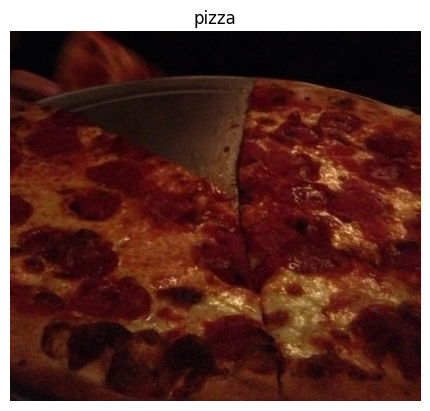

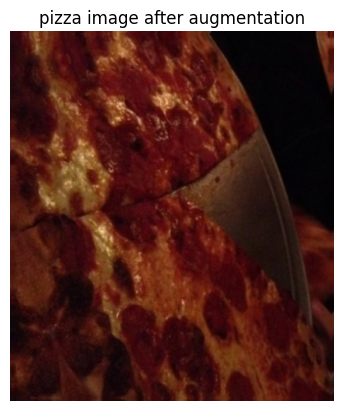

In [110]:
# Now if you want you can view how it affects an image

target_class = choice(os.listdir("/content/10_food_classes_10_percent/train/"))
target_dir = train_dir + target_class + "/"

target_image = choice(os.listdir(target_dir))
target_image_path = target_dir + target_image

# Read the image
img = mpimg.imread(target_image_path)
plt.imshow(img)
plt.title(target_class)
plt.axis(False)

plt.figure()
plt.title(f"{target_class} image after augmentation")
plt.axis(False)
aug_img = augmentation_layer(img,training=True)
plt.imshow(aug_img/255.)

In [111]:
# So yeah it works wonderfully now let's put it in the model
# Let's create the model

In [112]:
# First we make the input layer for that define input_shape
input_shape = (224,224,3)

# Now we create the base model
base_model = keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Let's now create the input layer
inputs = layers.Input(input_shape,name="Input_layer")

# Now let's pass it to our augmentation layer before feeding it to the base_model
x = augmentation_layer(inputs)

# Now let's pass this to our base model
x = base_model(x,training=False) # Pass the augmented images in inference mode in this the base model in not trained and batchnorm layers are not updated

# Let's Pool this
x = layers.GlobalAveragePooling2D(name="Global_Average_Pooling_layer")(x)

# Let's pass this through the output_layer
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

# combine both the inputs and outputs
model_2 = keras.Model(inputs,outputs)

# let's compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer='adam',
                metrics="accuracy")

# Let's fit the model
# history_model_2 = model_2.fit(train_data_10_percent,
#                               epochs=5,
#                               steps_per_epoch=len(train_data_10_percent),
#                               validation_data=test_data,
#                               validation_steps=0.25*len(test_data))


In [113]:
# plot_loss_curves(history_model_2)

### Creating a model checkpoint callback

The ModelCheckpoint callback gives you the ability to save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains.
This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains.

In [114]:
# Setup check point path
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback to save the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # Set to False to save the entire model
                                                         save_best_only=True, # save only the best weights instead of saving model at every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [115]:
# Because we will be fine tuning our model later lets create an initial epochs variable and set it to 5.
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)), # For quickness we do less steps verification
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231114-042527
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0267 - accuracy: 0.3360
Epoch 1: val_loss improved from inf to 1.44986, saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 20s 504ms/step - loss: 2.0267 - accuracy: 0.3360 - val_loss: 1.4499 - val_accuracy: 0.6513
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3926 - accuracy: 0.6293
Epoch 2: val_loss improved from 1.44986 to 1.04066, saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 460ms/step - loss: 1.3926 - accuracy: 0.6293 - val_loss: 1.0407 - val_accuracy: 0.7648
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1169 - accuracy: 0.7120
Epoch 3: val_loss improved from 1.04066 to 0.86321, saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [====

In [116]:
# Evaluate the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 5s 64ms/step - loss: 0.6662 - accuracy: 0.8204


[0.6661662459373474, 0.8203999996185303]

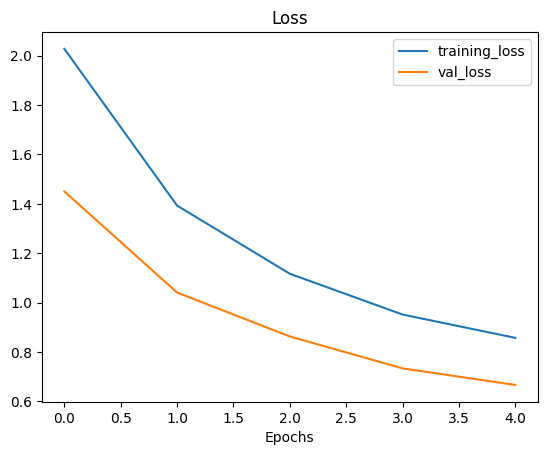

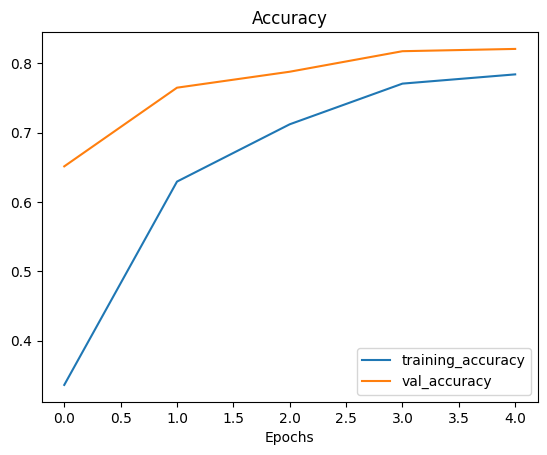

In [117]:
# Plot loss curves
plot_loss_curves(history_10_percent_data_aug)

# Model 3: Fine tuning on 10 Percent of the data

In [118]:
# To load saved model weights you can use the the load_weights() method, passing it the path where your saved weights are stored.
# Load in the saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 0.6662 - accuracy: 0.8204


In [119]:
# If the results from this loaded model are same as out native model then this should output True
results_10_percent_data_aug == loaded_weights_model_results # If False then it is because of percesion of how the numbers are stored in the computer they must be very close.

True

In [120]:
# Check if the numbers are close
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [121]:
# Check the difference between the two results (small values)
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[0. 0.]


🔑 **Note**: Fine-tuning usually works best after training a feature extraction model for a few epochs and with large amounts of data. For more on this, check out Keras' guide on Transfer learning & fine-tuning.

In [122]:
# Layers in loaded model
model_2.layers

In [123]:
# How about we check their names, numbers and if they are trainable?
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: Input_layer | layer type: <keras.src.engine.input_layer.InputLayer object at 0x7b40b833b910> | Trainable? True
Layer number: 1 | Layer name: sequential_1 | layer type: <keras.src.engine.sequential.Sequential object at 0x7b3fa996eb30> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | layer type: <keras.src.engine.functional.Functional object at 0x7b400a72eef0> | Trainable? False
Layer number: 3 | Layer name: Global_Average_Pooling_layer | layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b400a706c20> | Trainable? True
Layer number: 4 | Layer name: output_layer | layer type: <keras.src.layers.core.dense.Dense object at 0x7b400a756e90> | Trainable? True


In [124]:
# Since we set trainable = False in the base model of EfficientNetB0 we will not be able to Train this

In [125]:
model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, 3)           0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_Average_Pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [126]:
# Let's see what our EfficientNetB0 model has to offer in the terms of layers
model_2_base_model = model_2.layers[2]
model_2_base_model.name, model_2_base_model.layers

('efficientnetv2-b0',
  <keras.src.layers.core.activation.Activation at 0x7b40b8301d50>])

In [127]:
# how many layers in trainable are in our model_2
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_9 False
2 normalization_7 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

As you can see None of the layers are trainable
let's unfreeze the top 10 layers or the last 10 in this to fine tune
📖 Resource: The ULMFiT (Universal Language Model Fine-tuning for Text Classification)[https://arxiv.org/abs/1801.06146] paper has a great series of experiments on fine-tuning models.

In [128]:
# Make all the layers in the model_2_base_model trainable
model_2_base_model.trainable = True

# # Freeze all the layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any readjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics='accuracy')

In [129]:
# Now lets check our base models layers again
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_8 False
1 rescaling_9 False
2 normalization_7 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

🔑 Note: There's no set standard for setting the learning rate during fine-tuning, though reductions of (2.6x-10x+ seem to work well in practice)[https://arxiv.org/abs/1801.06146].

In [130]:
# How many trainable variables do we have?
print(len(model_2.trainable_variables))

12


In [131]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               steps_per_epoch=len(train_data_10_percent),
                                               validation_data=test_data,
                                               validation_steps=int(0.25*len(test_data)),
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               callbacks=[create_tensorboard_callback("transfer_learning","10_percent_fine_tune_last_10 ")]
                                               )

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10 /20231114-042643
Epoch 5/10
24/24 [==============================] - 20s 451ms/step - loss: 0.7056 - accuracy: 0.8160 - val_loss: 0.5429 - val_accuracy: 0.8322
Epoch 6/10
24/24 [==============================] - 10s 405ms/step - loss: 0.6242 - accuracy: 0.8120 - val_loss: 0.4998 - val_accuracy: 0.8273
Epoch 7/10
24/24 [==============================] - 9s 360ms/step - loss: 0.5897 - accuracy: 0.8133 - val_loss: 0.5089 - val_accuracy: 0.8207
Epoch 8/10
24/24 [==============================] - 10s 392ms/step - loss: 0.5364 - accuracy: 0.8147 - val_loss: 0.4970 - val_accuracy: 0.8322
Epoch 9/10
24/24 [==============================] - 9s 349ms/step - loss: 0.4853 - accuracy: 0.8467 - val_loss: 0.4787 - val_accuracy: 0.8355
Epoch 10/10
24/24 [==============================] - 10s 371ms/step - loss: 0.4736 - accuracy: 0.8493 - val_loss: 0.4543 - val_accuracy: 0.8438


In [132]:
# Evaluate the model on the last epoch
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.4621 - accuracy: 0.8436


In [133]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.335999995470047, 0.6293333172798157, 0.7120000123977661, 0.7706666588783264, 0.7839999794960022, 0.8159999847412109, 0.8119999766349792, 0.8133333325386047, 0.8146666884422302, 0.846666693687439, 0.8493333458900452]


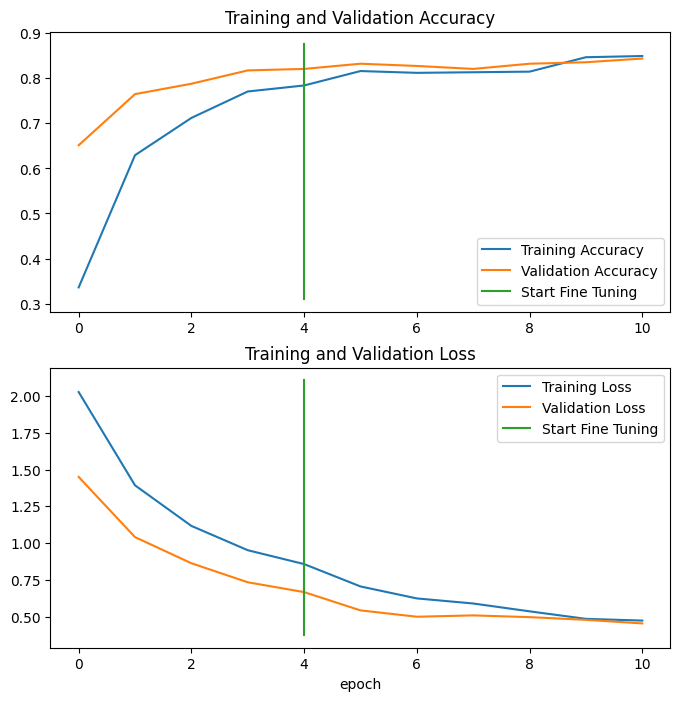

In [134]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

In [135]:
# Fine tuning usually works best with large amounts of data

# Model 4: Fine Tuning an existing model on all the data

In [136]:
# let's download full version of all the data in 10 food classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-11-14 04:28:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   162MB/s    in 3.1s    

2023-11-14 04:28:26 (162 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [137]:
# Setup Directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [138]:
# Walk through the directory to know what folders does it have
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [139]:
# load the images in tensor datasets
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_class_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                               image_size=IMG_SIZE,
                                                                               label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [140]:
# Let's evaluate our model_2
model_2.evaluate(test_data)

79/79 [==============================] - 6s 62ms/step - loss: 0.4621 - accuracy: 0.8436


[0.46205204725265503, 0.8435999751091003]

In [141]:
results_fine_tune_10_percent

[0.4620521366596222, 0.8435999751091003]

In [142]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
# model_2 = create_base_model()

In [143]:
# To keep our experiments clean we will instantiate our model 4 with new base model by create_base_model
model_2 = create_base_model(learning_rate=0.0001) # Lower the learning rate by 10x for fine tuning

In [144]:
# Loading the model at a previous checkpoint
model_2.load_weights(checkpoint_path)

In [145]:
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [148]:
# let's say I want to fine tune the last 10 layers
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Iterating except the last 10 layers
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False


In [151]:
for layer_number,layer in enumerate(model_2_base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_9 False
1 rescaling_10 False
2 normalization_8 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2

In [152]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics='accuracy')

In [156]:
fine_tune_epochs = initial_epochs+5

# Now fit the model
history_fine_full_classes = model_2.fit(train_data_10_class_full,
            epochs=fine_tune_epochs,
            initial_epoch=history_10_percent_data_aug.epoch[-1],
            steps_per_epoch=len(train_data_10_class_full),
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=[create_tensorboard_callback("transfer_learning", "10_full_fine_tune")])

Saving TensorBoard log files to: transfer_learning/10_full_fine_tune/20231114-045434
Epoch 5/10
235/235 [==============================] - 37s 155ms/step - loss: 0.4331 - accuracy: 0.8625 - val_loss: 0.2762 - val_accuracy: 0.9145
Epoch 6/10
235/235 [==============================] - 35s 148ms/step - loss: 0.4245 - accuracy: 0.8609 - val_loss: 0.2735 - val_accuracy: 0.9095
Epoch 7/10
235/235 [==============================] - 35s 147ms/step - loss: 0.3988 - accuracy: 0.8697 - val_loss: 0.2278 - val_accuracy: 0.9211
Epoch 8/10
235/235 [==============================] - 36s 150ms/step - loss: 0.3850 - accuracy: 0.8741 - val_loss: 0.2679 - val_accuracy: 0.9145
Epoch 9/10
235/235 [==============================] - 32s 136ms/step - loss: 0.3682 - accuracy: 0.8799 - val_loss: 0.2506 - val_accuracy: 0.9227
Epoch 10/10
235/235 [==============================] - 30s 124ms/step - loss: 0.3523 - accuracy: 0.8841 - val_loss: 0.2079 - val_accuracy: 0.9309


In [158]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 63ms/step - loss: 0.2458 - accuracy: 0.9144


[0.24579446017742157, 0.9143999814987183]

In [159]:
results_fine_tune_10_percent

[0.4620521366596222, 0.8435999751091003]

5
11
[0.335999995470047, 0.6293333172798157, 0.7120000123977661, 0.7706666588783264, 0.7839999794960022, 0.8625333309173584, 0.8609333038330078, 0.8697333335876465, 0.8741333484649658, 0.8798666596412659, 0.8841333389282227]


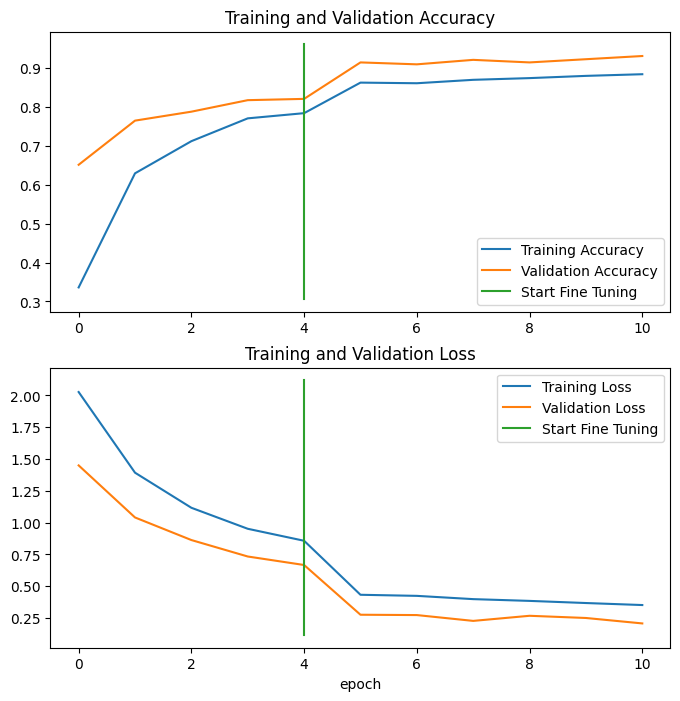

In [160]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_full_classes,
                 initial_epochs=5)

### Basic overview of creating a model with Fine-tuning
1. Load the weights of any previously trained model
2. see the layer.name, layer.trainable by model.layers here you will see a layer that is not trainable and that is your functional object that was trained by feature extraction.
3. You can check what layers does our base model has by base_model = model.layers[2] or its position in the model
4. Now how many layers do you want to fine tune you can see all the layer name with trainable or not with base_model.layers.name, base_model.layers.trainable and go to last to see how many top layers you want to fine tune.
5. Now all the layers in our base model are non trainable to make it trainable we need to do: base_model.trainable =True ; iterate through all the layer except the last 10 and set their trainable=False
`for layer_number,layer in enumerate(model_2_base_model.layers):
  print(layer_number,layer.name,layer.trainable)`
6. Then recompile the model after making the changes. Now check again if the layers are trainable or not.
7. Now to fit the model fine_tune_epochs = initial_epochs + 5
model.fit(epochs=fine_tune_epochs
          initial_epoch=history_last_model.epoch[-1]
          callbacks=[tensorboard_callback])
8. Evaluate the model
9. compare the histories



In [161]:
# Upload to tensorboard dev
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./transfer_learning \
#   --name "Transfer learning experiments" \
#   --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
#   --one_shot # exits the uploader when upload has finished

In [162]:
# View previous experiments
# !tensorboard dev list

In [147]:
# Remove previous experiments
# !tensorboard dev delete --experiment_id OUbW0O3pRqqQgAphVBxi8Q